In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest

df = pd.read_csv("assessment_da25.csv")

df.head()

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
0,A,5,0.0,0,2,74,0
1,A,4,0.0,4,1,21,1
2,A,4,0.0,2,0,1,2
3,A,5,0.0,0,1,26,3
4,A,5,0.0,3,3,46,4


In [3]:
# count variants to see if they are equaly distributed
variant_counts = df['Variant'].value_counts()
print(variant_counts)

# Check for duplicates
duplicates = df.duplicated().any()

if duplicates:
    print("Duplicates exist in the dataset.")
else:
    print("No duplicates found in the dataset.")

# Check for missing values
missing_values = df.isna().sum()

print("Missing values in each column:")
print(missing_values)


Variant
A    1000
B    1000
Name: count, dtype: int64
No duplicates found in the dataset.
Missing values in each column:
Variant                  0
Number of page views     0
GMV (in $)               0
Number of add to cart    0
Clicks on media          0
Time on Page (sec)       0
user_id                  0
dtype: int64


In [4]:
# Filter data into variant A and variant B
variant_a = df["Variant"] == "A"
variant_b = df["Variant"] == "B"

In [5]:
# Check if one of the variants has more puchases than the other

purchased = df["GMV (in $)"] > 0.0

# Total number of observations for each variant
tot_obs_a = df[variant_a].shape[0]
tot_obs_b = df[variant_b].shape[0]

# Number of purchases for each variant
purchase_a = df[variant_a & purchased].shape[0]
purchase_b = df[variant_b & purchased].shape[0]

if purchase_a > purchase_b:
    print("Variant A has more purchasing customers")
elif purchase_a < purchase_b:
    print("Variant B has more purchasing customers")
else:
    print("No difference in number of purchasing customers between the variants")
    
print(f"Variant A purchases: {purchase_a}")
print(f"Variant B purchases: {purchase_b}")

Variant B has more purchasing customers
Variant A purchases: 80
Variant B purchases: 97


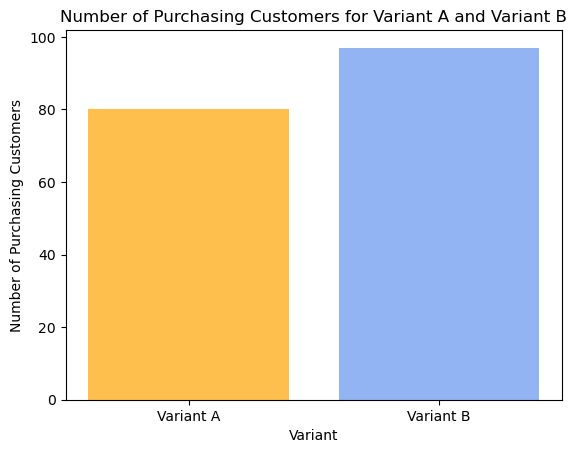

In [6]:
# Define the data
variants = ['Variant A', 'Variant B']
purchase_counts = [purchase_a, purchase_b]

# Bar chart
plt.bar(variants, purchase_counts, color=['Orange', '#6495ED'], alpha=0.7)
plt.xlabel('Variant')
plt.ylabel('Number of Purchasing Customers')
plt.title('Number of Purchasing Customers for Variant A and Variant B')
plt.show()



In [7]:
# Proportions of purchases between two independent groups 
    # --> z-test for proportions.

# Number of non-purchases for each variant
non_purchase_a = tot_obs_a - purchase_a
non_purchase_b = tot_obs_b - purchase_b

# Perform z-test for proportions
count = np.array([purchase_a, purchase_b])
nobs = np.array([tot_obs_a, tot_obs_b])
z_stat, p_value = proportions_ztest(count, nobs)

# Print the test statistic and p-value
print("Z-test for proportions results:")
print("Z-score:", z_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject null hypothesis, the measured difference is statistically significant")
else:
    print("Fail to reject null hypothesis, the measured difference is not statistically significant")

Z-test for proportions results:
Z-score: -1.3383939096387558
p-value: 0.18076806320424155
Fail to reject null hypothesis, the measured difference is not statistically significant


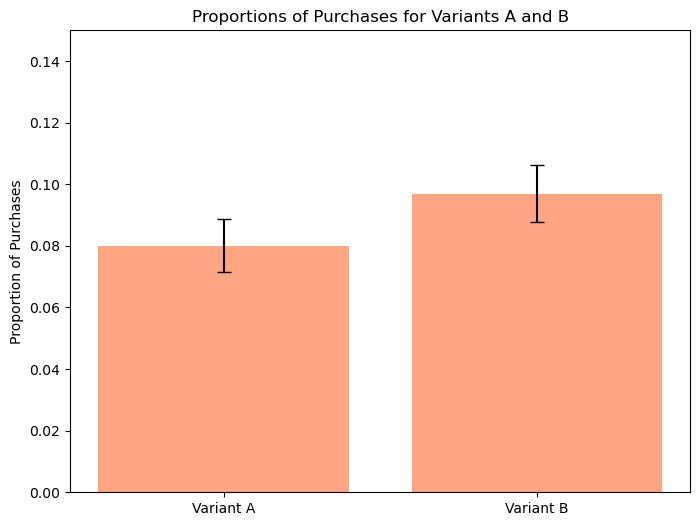

In [8]:
# Z test for proportions

# Calculate proportions of purchases
proportion_a = purchase_a / tot_obs_a
proportion_b = purchase_b / tot_obs_b

# Calculate standard errors for proportions
se_a = np.sqrt(proportion_a * (1 - proportion_a) / tot_obs_a)
se_b = np.sqrt(proportion_b * (1 - proportion_b) / tot_obs_b)

# Plot bar plot with error bars
plt.figure(figsize=(8, 6))
plt.bar(['Variant A', 'Variant B'], [proportion_a, proportion_b], yerr=[se_a, se_b], capsize=5, color="Coral", alpha=0.7)
plt.title('Proportions of Purchases for Variants A and B')
plt.ylabel('Proportion of Purchases')
plt.ylim(0, 0.15)
plt.show()

In [10]:
# Number of clicks per user for both variants
clicks_variant_a = df[df['Variant'] == 'A']['Clicks on media']
clicks_variant_b = df[df['Variant'] == 'B']['Clicks on media']

# Mean value of clicks for each variant
print("Mean clicks on media for Variant A:", clicks_variant_a.mean())
print("Mean clicks on media for Variant B:", clicks_variant_b.mean())

Mean clicks on media for Variant A: 1.495
Mean clicks on media for Variant B: 1.324


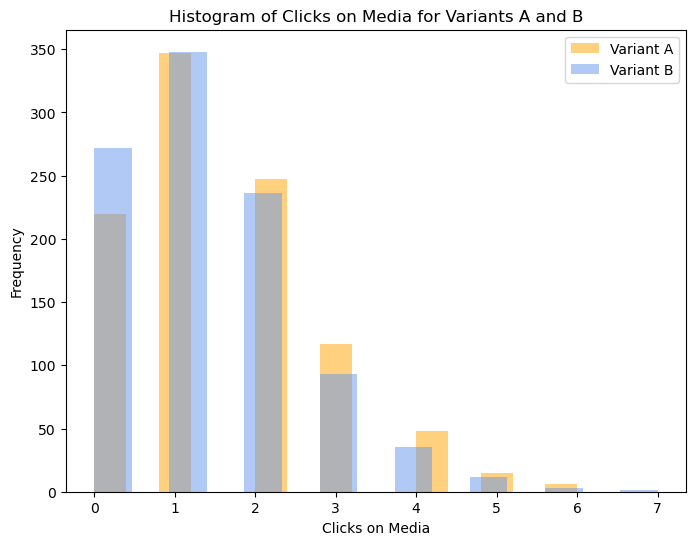

In [11]:
# Histograms for clicks on media
plt.figure(figsize=(8, 6))
plt.hist(clicks_variant_a, bins=15, alpha=0.5, label='Variant A', color='Orange')
plt.hist(clicks_variant_b, bins=15, alpha=0.5, label='Variant B', color='#6495ED')
plt.title('Histogram of Clicks on Media for Variants A and B')
plt.xlabel('Clicks on Media')
plt.ylabel('Frequency')
plt.legend()
plt.show()

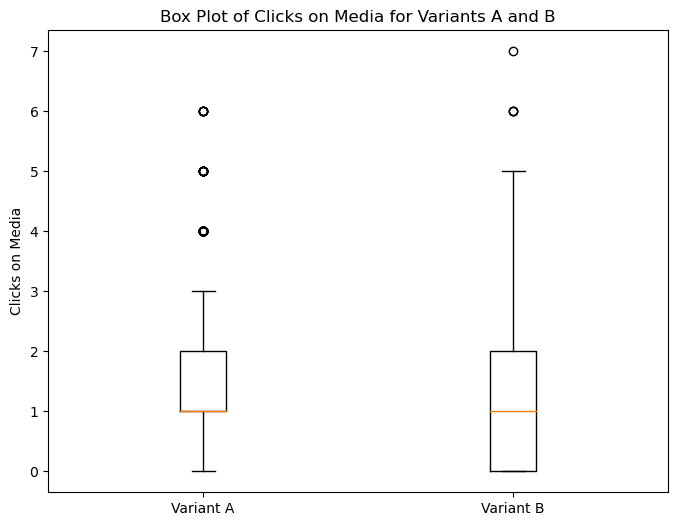

In [12]:
# Box plot for clicks on media
plt.figure(figsize=(8, 6))
plt.boxplot([clicks_variant_a, clicks_variant_b], labels=['Variant A', 'Variant B'])
plt.title('Box Plot of Clicks on Media for Variants A and B')
plt.ylabel('Clicks on Media')
plt.show()

In [17]:
# Comparing the means of two independent groups

# Two-sample t-test
t_statistic, p_value = ttest_ind(clicks_variant_a, clicks_variant_b)

print("Two-sample t-test results:")
print("Test statistic:", t_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject null hypothesis, the measured difference is statistically significant")
else:
    print("Fail to reject null hypothesis, the measured difference is not statistically significant")

Two-sample t-test results:
Test statistic: 3.1710702328903153
p-value: 0.0015418189281850277
Reject null hypothesis, the measured difference is statistically significant
